In [1]:
# 1. Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# 2. Load the Dataset
df = pd.read_csv('ai4i2020_1.csv')
print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,UDI,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


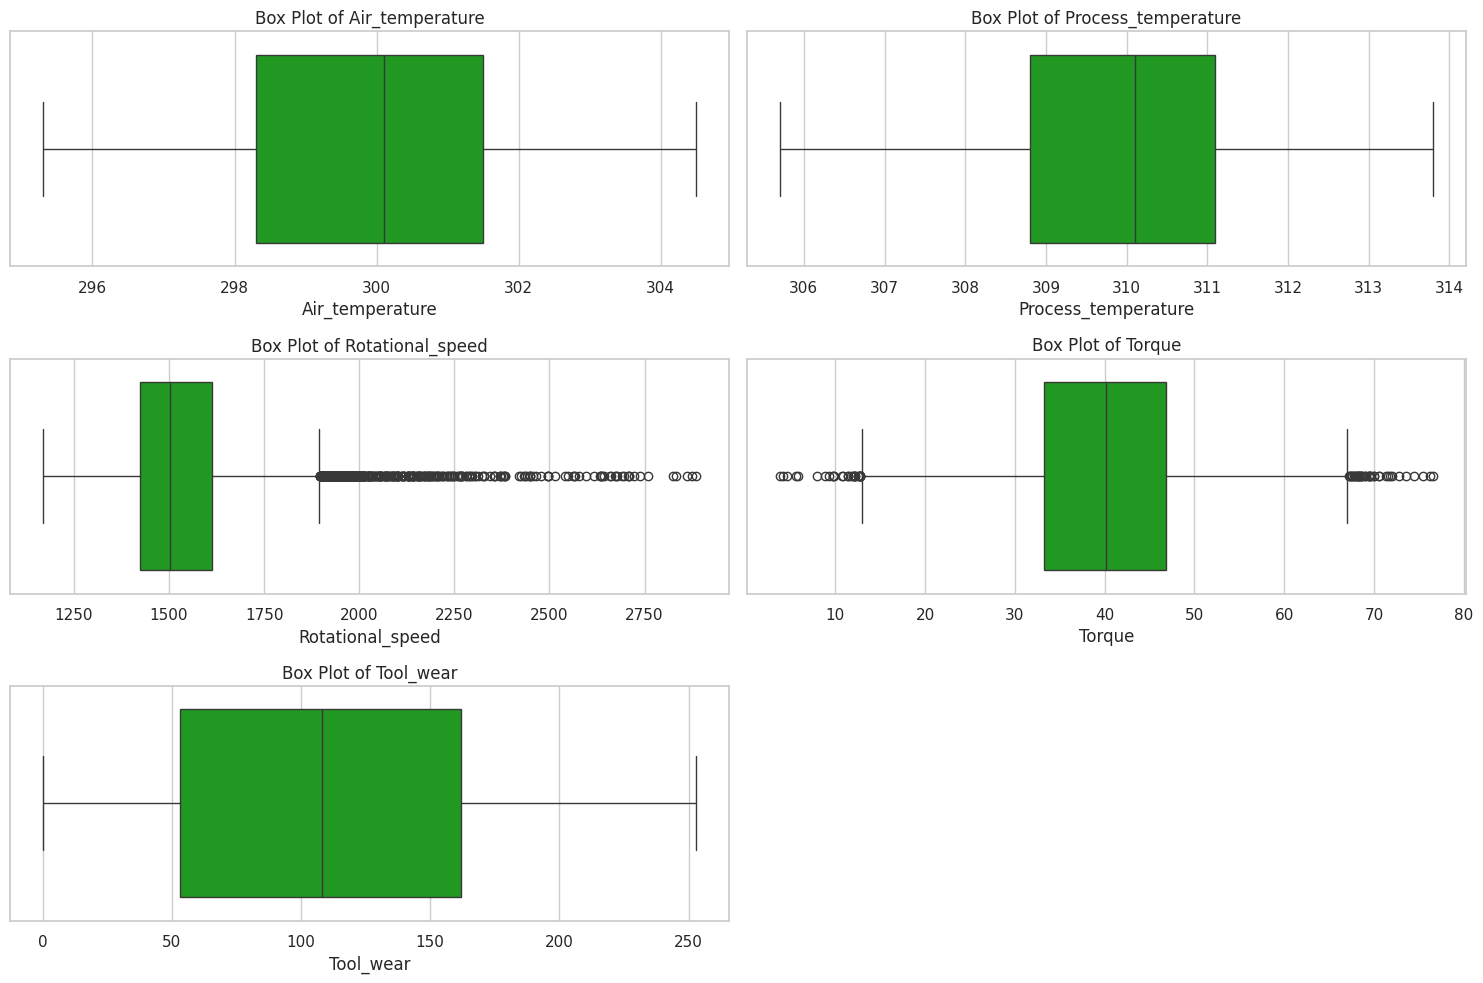

In [3]:
#Plotting Boxplot of the Input Data
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Function to create box plots for numerical features
def plot_boxplots(df):
    numerical_cols = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(3, 2, i)
        sns.boxplot(x=df[col], color='#0dac0d')  # Apply custom color
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Call the function to plot box plots
plot_boxplots(df)


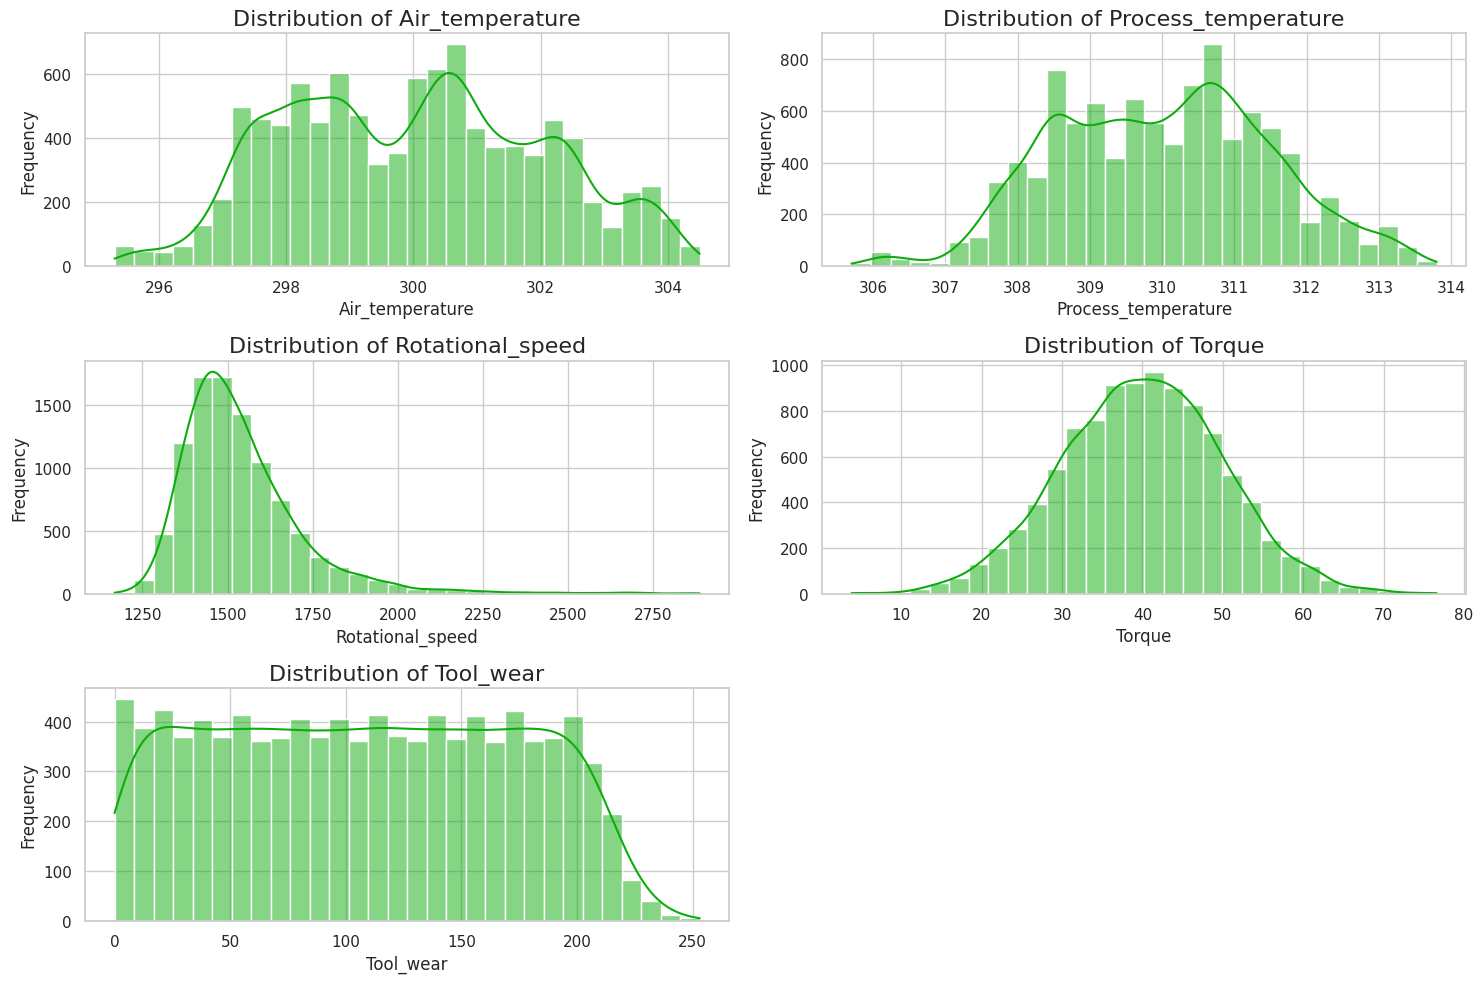

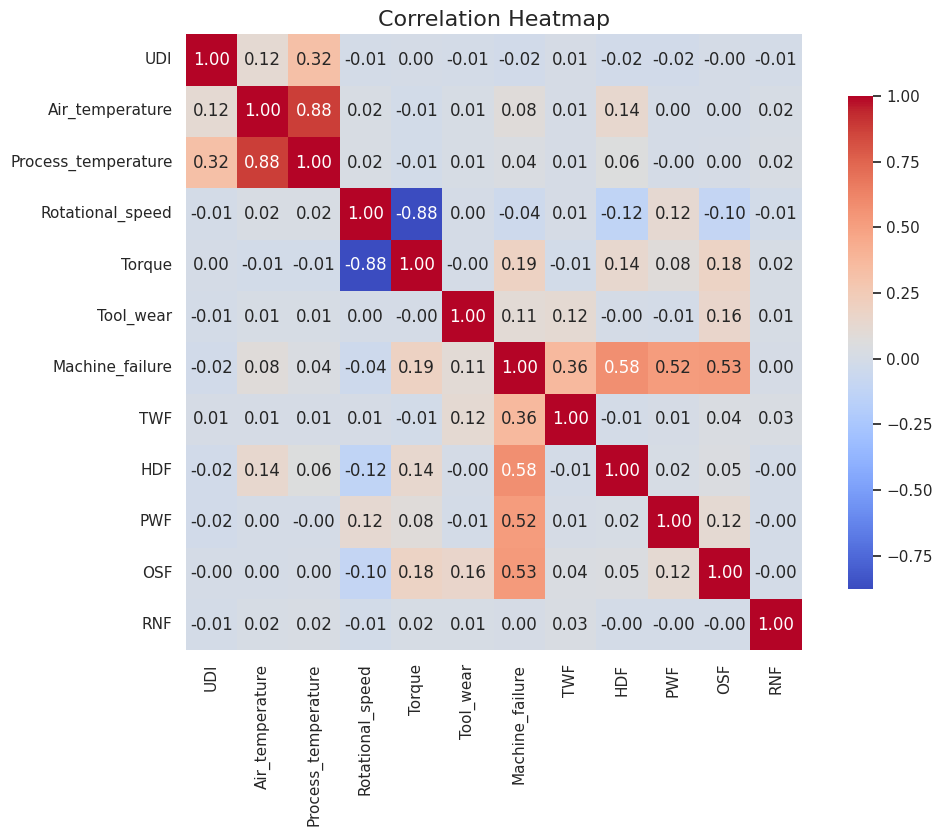

<ipython-input-4-d4d4b7111ebf>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel')


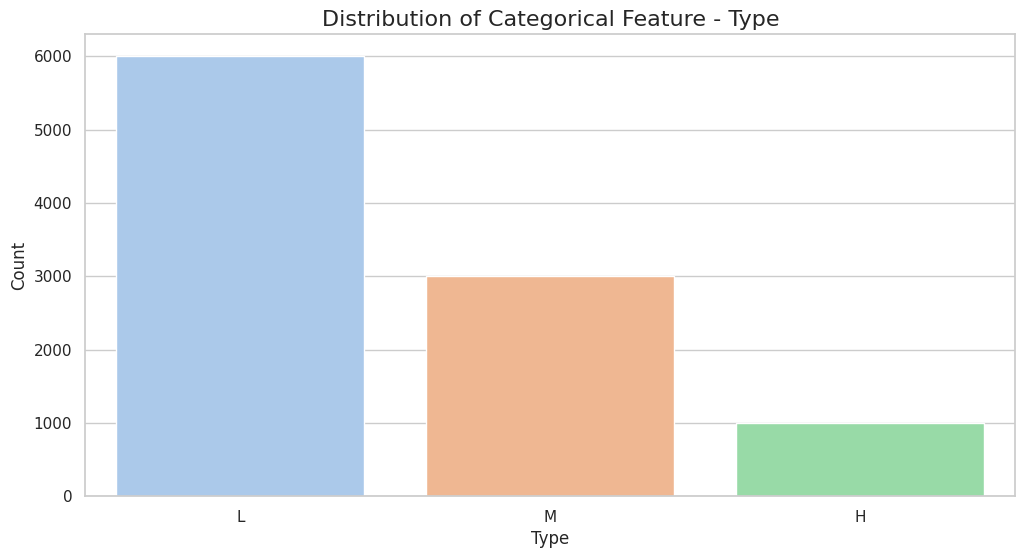

In [4]:
#Plot the histogram for range of data and correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# 1. Distribution of Numerical Features
def plot_numerical_distributions(df):
    numerical_cols = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(3, 2, i)
        # Change color using 'color' parameter
        sns.histplot(df[col], kde=True, bins=30, color='#0dac0d')
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function to plot distributions
plot_numerical_distributions(df)

# 2. Correlation Heatmap
def plot_correlation_heatmap(df):
    # Select only numeric columns for correlation
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    plt.figure(figsize=(12, 8))
    correlation = numeric_df.corr()  # Compute the correlation matrix
    sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Heatmap', fontsize=16)
    plt.show()

# Call the function to plot the correlation heatmap
plot_correlation_heatmap(df)

# 3. Categorical Feature Distribution
def plot_categorical_distribution(df):
    plt.figure(figsize=(12, 6))
    type_counts = df['Type'].value_counts()
    # Change color using palette parameter
    sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel')
    plt.title('Distribution of Categorical Feature - Type', fontsize=16)
    plt.xlabel('Type', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

# Call the function to plot categorical distribution
plot_categorical_distribution(df)


In [5]:
# 3. Data Preprocessing
# 3.1. Check data types
print("Data types:")
print(df.dtypes)

# 3.2. Handle Missing Values
imputer = SimpleImputer(strategy='mean')
df[['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']] = imputer.fit_transform(
    df[['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']]
)

# 3.3. Drop non-numeric columns that won't be used for training
df.drop(columns=['UDI', 'Product ID'], inplace=True)

# 3.4. Categorical Feature Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
type_encoded = one_hot_encoder.fit_transform(df[['Type']])
type_encoded_df = pd.DataFrame(type_encoded, columns=one_hot_encoder.get_feature_names_out(['Type']))

# 3.5. Concatenate the encoded features with the original DataFrame (excluding the original 'Type' column)
df = pd.concat([df.drop('Type', axis=1), type_encoded_df], axis=1)


Data types:
UDI                      int64
Product ID              object
Type                    object
Air_temperature        float64
Process_temperature    float64
Rotational_speed         int64
Torque                 float64
Tool_wear                int64
Machine_failure          int64
TWF                      int64
HDF                      int64
PWF                      int64
OSF                      int64
RNF                      int64
dtype: object


In [6]:
# 4. Train-Test Split
X = df[['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']]  # Features
y = df[['Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']]  # Target Variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of samples in each dataset
print(f"Number of samples in the training set: {X_train.shape[0]}")
print(f"Number of samples in the test set: {X_test.shape[0]}")
print("Train-test split completed.")


Number of samples in the training set: 8000
Number of samples in the test set: 2000
Train-test split completed.


In [7]:
# 5. Model Training
# 5.1. Define the Multi-Output Classifier with Random Forest
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

# 5.2. Train the model using the original y_train
model.fit(X_train, y_train)
print("Model training completed.")



Model training completed.


In [8]:
# 6. Predictions
# 6.1. Make predictions on the test set
y_pred_multi = model.predict(X_test)

# 6.2. Display the predictions
y_pred_multi_df = pd.DataFrame(y_pred_multi, columns=['Machine_failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
print("Predictions made on the test set:")
print(y_pred_multi_df.head())  # Display the first few predictions


Predictions made on the test set:
   Machine_failure  TWF  HDF  PWF  OSF  RNF
0                0    0    0    0    0    0
1                0    0    0    0    0    0
2                0    0    0    0    0    0
3                0    0    0    0    0    0
4                0    0    0    0    0    0


In [9]:
# 7. Model Evaluation
# 7.1. Calculate accuracy for each output
for i, col in enumerate(y.columns):
    accuracy = accuracy_score(y_test[col], y_pred_multi[:, i])
    print(f"Accuracy for {col}: {accuracy:.4f}")

# 7.2. Print classification report for each output
print("\nClassification Report:")
for i, col in enumerate(y.columns):
    print(f"\nClassification report for {col}:")
    print(classification_report(y_test[col], y_pred_multi[:, i]))


Accuracy for Machine_failure: 0.9835
Accuracy for TWF: 0.9945
Accuracy for HDF: 0.9980
Accuracy for PWF: 0.9970
Accuracy for OSF: 0.9950
Accuracy for RNF: 0.9970

Classification Report:

Classification report for Machine_failure:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.82      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.90      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000


Classification report for TWF:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1989
           1       0.00      0.00      0.00        11

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000


Classification report for HDF:
              precision    recall  f1-score   suppor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


Accuracy for Machine_failure: 0.9835
Accuracy for TWF: 0.9945
Accuracy for HDF: 0.9980
Accuracy for PWF: 0.9970
Accuracy for OSF: 0.9950
Accuracy for RNF: 0.9970

Classification Report:

Classification report for Machine_failure:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.82      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.90      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000



<Figure size 600x600 with 0 Axes>

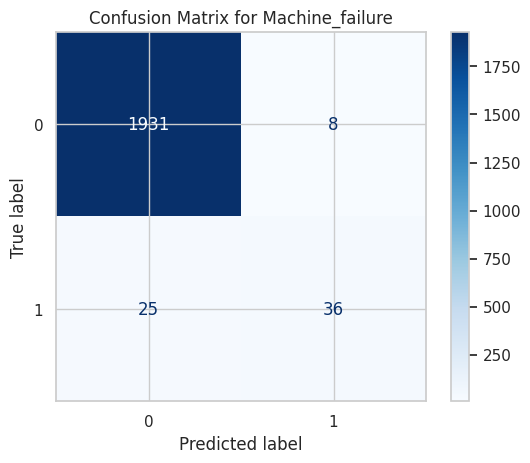


Classification report for TWF:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1989
           1       0.00      0.00      0.00        11

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 600x600 with 0 Axes>

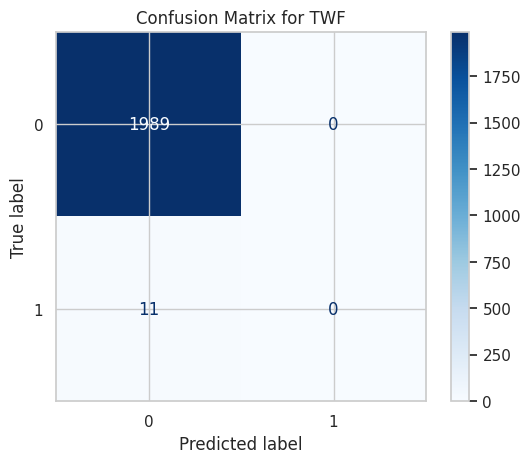


Classification report for HDF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1983
           1       1.00      0.76      0.87        17

    accuracy                           1.00      2000
   macro avg       1.00      0.88      0.93      2000
weighted avg       1.00      1.00      1.00      2000



<Figure size 600x600 with 0 Axes>

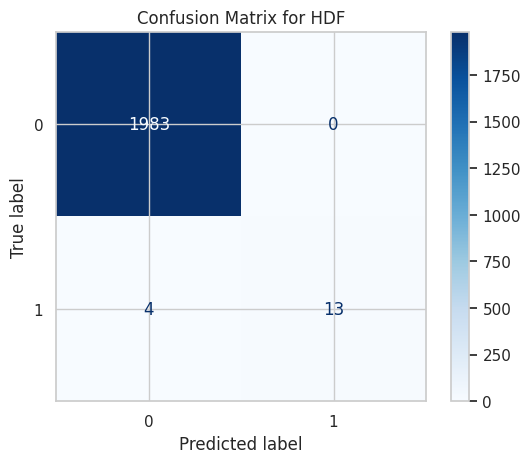


Classification report for PWF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1980
           1       0.94      0.75      0.83        20

    accuracy                           1.00      2000
   macro avg       0.97      0.87      0.92      2000
weighted avg       1.00      1.00      1.00      2000



<Figure size 600x600 with 0 Axes>

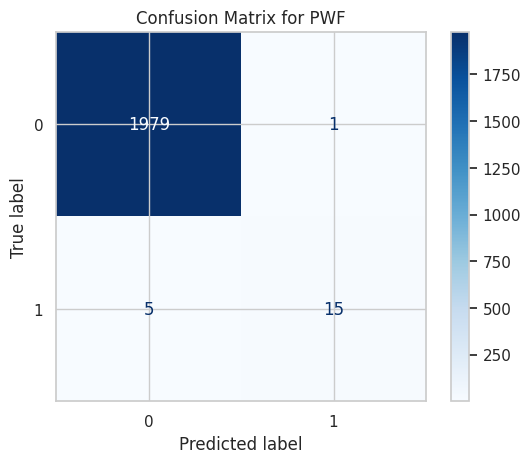


Classification report for OSF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1982
           1       0.90      0.50      0.64        18

    accuracy                           0.99      2000
   macro avg       0.95      0.75      0.82      2000
weighted avg       0.99      0.99      0.99      2000



<Figure size 600x600 with 0 Axes>

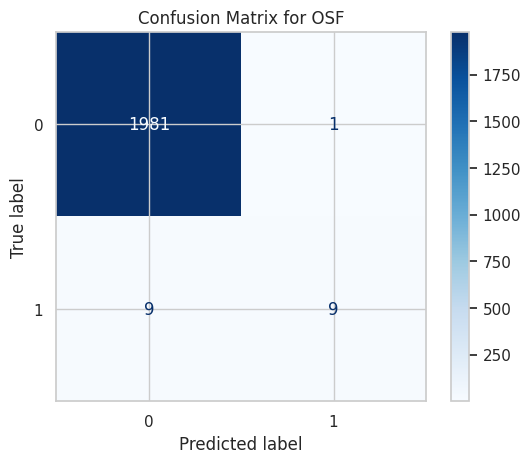


Classification report for RNF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1994
           1       0.00      0.00      0.00         6

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      1.00      1.00      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 600x600 with 0 Axes>

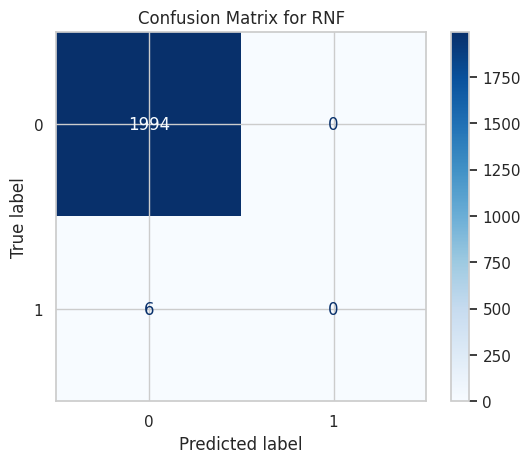

In [11]:
# 7. Model Evaluation
# 7.1. Calculate accuracy for each output
for i, col in enumerate(y.columns):
    accuracy = accuracy_score(y_test[col], y_pred_multi[:, i])
    print(f"Accuracy for {col}: {accuracy:.4f}")

# 7.2. Print classification report for each output
print("\nClassification Report:")
for i, col in enumerate(y.columns):
    print(f"\nClassification report for {col}:")
    print(classification_report(y_test[col], y_pred_multi[:, i]))

    # 7.3. Print confusion matrix for each output
    cm = confusion_matrix(y_test[col], y_pred_multi[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

    plt.figure(figsize=(6, 6))
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {col}')
    plt.show()


In [12]:
import joblib

# Save the trained model
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']